In [3]:
import pandas as pd
import numpy as np

In [6]:
univ_df = pd.read_csv("expanded.csv")
univ_df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [ ]:
#2. Выполнить классификацию метод K ближайших соседей :
#1.2 Выполнить разбиение исходного набора на обучающую и тестовую выборки:
#1.2.1. Применить алгоритм классификации для различного количества соседей (3,5,7)

       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none    

C:\Users\maxim\AppData\Local\Temp\ipykernel_9180\140498857.py:10: RuntimeWarning: invalid value encountered in cast
  klassifDf["EthnicGroup"] = ordEnc.fit_transform(univ_df[["EthnicGroup"]]).astype(int)


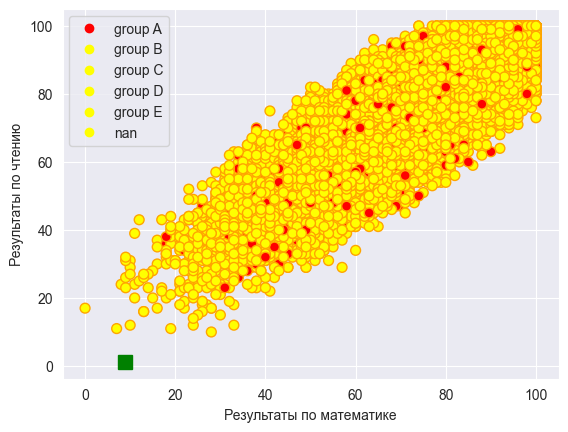

In [9]:
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

ordEnc = OrdinalEncoder()
klassifDf = univ_df.copy()
print(klassifDf)
klassifDf["EthnicGroup"] = ordEnc.fit_transform(univ_df[["EthnicGroup"]]).astype(int)
print(klassifDf)

arbitrX = np.random.uniform(0,10,2) #тестовая точка

scat = plt.scatter(x = klassifDf['MathScore'], y = klassifDf['ReadingScore'], c = klassifDf["EthnicGroup"], cmap = ListedColormap(["red", "green", "blue", "orange", "pink", "purple", "black", "yellow"]), edgecolors = "orange", s = 50)
plt.xlabel("Результаты по математике")
plt.ylabel("Результаты по чтению")
plt.plot(arbitrX[0], arbitrX[1], "gs", markersize = 10)
plt.legend(handles=scat.legend_elements()[0], labels = list(ordEnc.categories_[0]))
plt.show()

In [10]:
# Преобразуем данные - to_numpy

knnX = klassifDf[['EthnicGroup','MathScore']].to_numpy()
knnY = klassifDf[["EthnicGroup"]].to_numpy()
print(knnX.shape)
print(knnY.shape)

# Приведем тестовые данные к обучающей форме

knnY = knnY.reshape(-1)
print(f"Y shape: {knnY.shape}")
arbitrX = arbitrX.reshape(1,-1)
print(f"Test X shape: {arbitrX.shape}")

(30641, 2)
(30641, 1)
Y shape: (30641,)
Test X shape: (1, 2)


In [ ]:
#Алгоритм классификации для 3х соседеей:

Предсказаный класс точки: [3]
3 ближайших соседей:
[[[2 0]
  [3 7]
  [3 9]]]


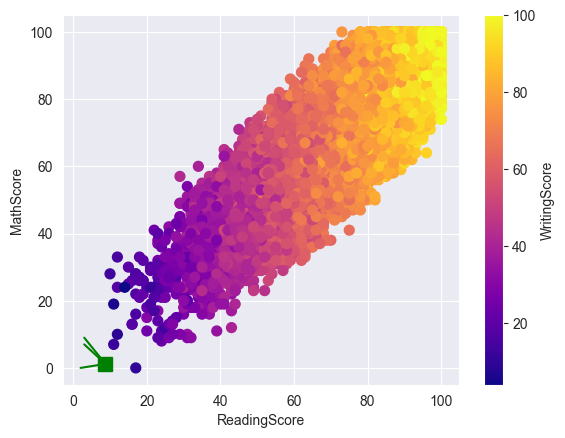

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 3
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

klassifDf.plot.scatter(x="ReadingScore", y="MathScore", c="WritingScore", colormap="plasma", s = 50)
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

In [14]:
#Алгоритм классификации для 9ых соседеей:

Предсказаный класс точки: [3]
9 ближайших соседей:
[[[ 2  0]
  [ 3  7]
  [ 3  9]
  [ 3  9]
  [ 1  8]
  [ 3 10]
  [ 1  9]
  [ 2 10]
  [ 2 10]]]


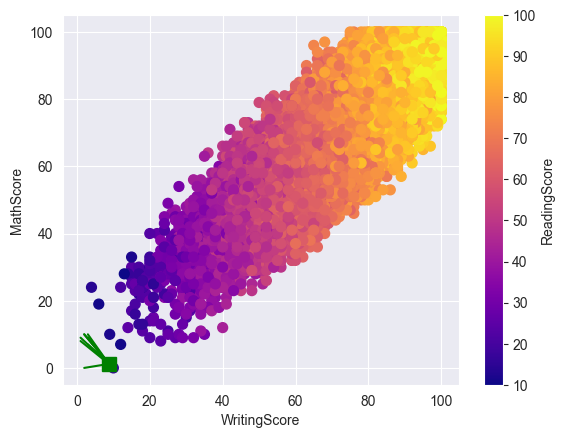

In [20]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 9
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

klassifDf.plot.scatter(x="WritingScore", y="MathScore", c="ReadingScore", colormap="plasma", s = 50)
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

In [16]:
#Алгоритм классификации для 15ти соседеей:

Предсказаный класс точки: [2]
15 ближайших соседей:
[[[ 2  0]
  [ 3  7]
  [ 3  9]
  [ 3  9]
  [ 1  8]
  [ 3 10]
  [ 1  9]
  [ 2 10]
  [ 2 10]
  [ 0  9]
  [ 1 10]
  [ 2 11]
  [ 2 11]
  [ 1 11]
  [ 2 12]]]


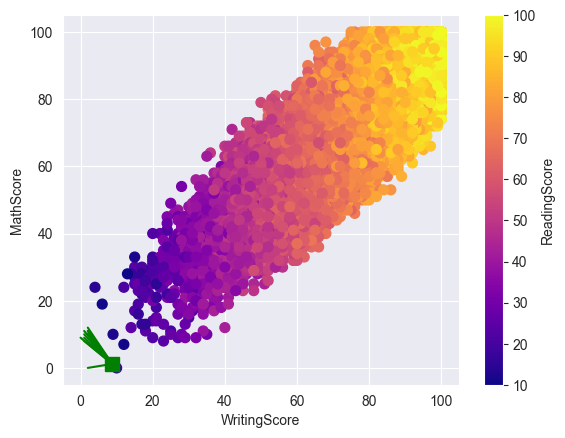

In [21]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 15
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

klassifDf.plot.scatter(x="WritingScore", y="MathScore", c="ReadingScore", colormap="plasma", s = 50)
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

In [22]:
#1.2.2 Сравнить предсказание с метками тестовой выборки

In [24]:
# Перед проверкой разобьем набор данных на обучающую и тестовую выборку
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Проведем нормирование

DfNorm = klassifDf[["EthnicGroup", "MathScore", "ReadingScore", "WritingScore"]]

xDf = preprocessing.normalize(DfNorm.iloc[:, 1:], axis=0)
print(xDf)
yDf= DfNorm["EthnicGroup"].to_numpy()

#Разделим выборку на обучающую и тестовую для 3х соседей

xTrain, xTest, yTrain, yTest = train_test_split(xDf,yDf, test_size = 0.33, shuffle = True)
overKnn = KNeighborsClassifier(n_neighbors = 3)
overKnn.fit(xTrain, yTrain)
yPred1 = overKnn.predict(xTest)

print("\n",yTest == yPred1, "\n")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred1, return_counts=True)
print(f"тестов: {testCounts},\n предск: {predCounts}")

[[0.00593793 0.00571843 0.0060272 ]
 [0.00577066 0.00724872 0.00716748]
 [0.00727605 0.00749034 0.00741182]
 ...
 [0.0051016  0.00563789 0.00545705]
 [0.00685789 0.00724872 0.00757472]
 [0.0053525  0.00483248 0.00472402]]

 [False False False ... False  True False] 

тестов: [ 600  709 1959 3112 2447 1285],
 предск: [1287 1340 2452 2674 1665  694]


In [25]:
#Разделим выборку на обучающую и тестовую для 9ых соседей

xTrain, xTest, yTrain, yTest = train_test_split(xDf,yDf, test_size = 0.33, shuffle = True)
overKnn = KNeighborsClassifier(n_neighbors = 9)
overKnn.fit(xTrain, yTrain)
yPred2 = overKnn.predict(xTest)

print("\n",yTest == yPred2, "\n")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred2, return_counts=True)
print(f"тестов: {testCounts},\n предск: {predCounts}")


 [False False  True ... False False  True] 

тестов: [ 624  700 1844 3073 2528 1343],
 предск: [ 248  372 2170 4200 2341  781]


In [26]:
#Разделим выборку на обучающую и тестовую для 15 соседей

xTrain, xTest, yTrain, yTest = train_test_split(xDf,yDf, test_size = 0.33, shuffle = True)
overKnn = KNeighborsClassifier(n_neighbors = 15)
overKnn.fit(xTrain, yTrain)
yPred3 = overKnn.predict(xTest)

print("\n",yTest == yPred3, "\n")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred3, return_counts=True)
print(f"тестов: {testCounts},\n предск: {predCounts}")


 [False False False ... False False  True] 

тестов: [ 587  778 1894 3076 2481 1296],
 предск: [  47  145 1807 4744 2610  759]


In [27]:
#1.3. Объяснить, какой из какой из параметров метода дает лучший результат

In [28]:
#Наилучший результат оказался при количестве соседей равным 3, тк значения обучающей и тестовой выборки имеют большее совпадение.

In [29]:
#1.2.4 Построить Confusion Matrix, дать пояснения:

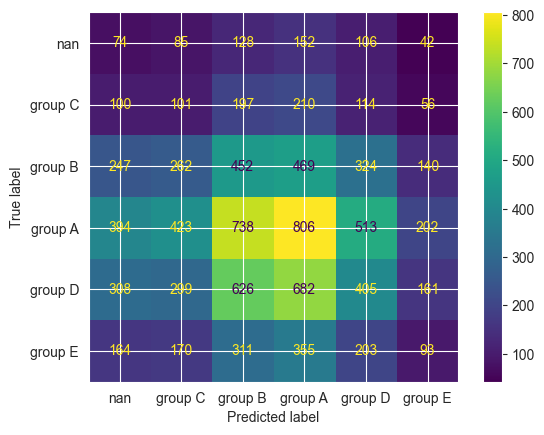

              precision    recall  f1-score   support

 -2147483648       0.06      0.13      0.08       587
           0       0.08      0.13      0.10       778
           1       0.18      0.24      0.21      1894
           2       0.30      0.26      0.28      3076
           3       0.24      0.16      0.20      2481
           4       0.13      0.07      0.09      1296

    accuracy                           0.19     10112
   macro avg       0.17      0.17      0.16     10112
weighted avg       0.21      0.19      0.20     10112



In [30]:
#Количество соседей - 3

conMat = confusion_matrix(yTest, yPred1 )
conMat

cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat, display_labels = univ_df["EthnicGroup"].unique ())
cmDisp.plot()
plt.show()


print(classification_report(yTest, yPred1))

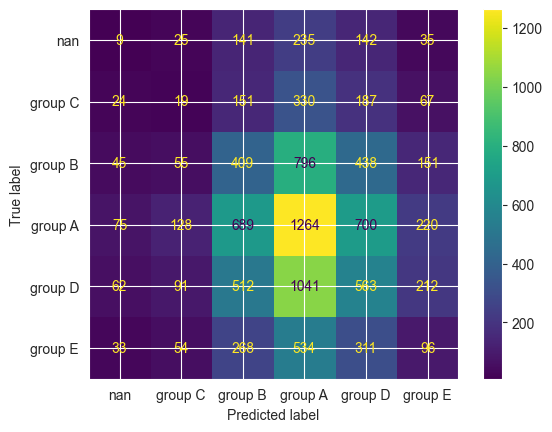

              precision    recall  f1-score   support

 -2147483648       0.04      0.02      0.02       587
           0       0.05      0.02      0.03       778
           1       0.19      0.22      0.20      1894
           2       0.30      0.41      0.35      3076
           3       0.24      0.23      0.23      2481
           4       0.12      0.07      0.09      1296

    accuracy                           0.23     10112
   macro avg       0.16      0.16      0.15     10112
weighted avg       0.21      0.23      0.22     10112



In [31]:
#Количество соседей - 9

conMat = confusion_matrix(yTest, yPred2)
conMat

cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat, display_labels = univ_df["EthnicGroup"].unique ())
cmDisp.plot()
plt.show()


print(classification_report(yTest, yPred2))

In [32]:
#3. Методы регрессии:
#1. Выбрать в качестве X и Y числовые переменные (если требуется, нормировать данные)
#x - MathScore
#y - WritingScore

In [33]:
#3.2. Разбить выборку на обучающую и тестовую:

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


scaler = StandardScaler()

#нормируем данные
regrDf = univ_df.copy();

x = scaler.fit_transform(regrDf[["MathScore"]])

y = scaler.fit_transform(regrDf[["WritingScore"]])


bosXTrain, bosXTest, bosYTrain, bosYTest = train_test_split(x, y, test_size = 0.25)
bostonRegr = KNeighborsRegressor(n_neighbors=5)
bostonRegr.fit(bosXTrain, bosYTrain)
bosXPred = bostonRegr.predict(bosXTest)


np.c_[bosXPred, bosXTest]

array([[ 1.55286889,  0.94012465],
       [-0.58398386, -0.55713813],
       [ 0.99599211,  1.39581332],
       ...,
       [ 1.38451079,  1.65620685],
       [ 1.38451079,  1.65620685],
       [ 0.89238713,  0.54953436]])

In [42]:
#3.3 Построить регрессионные модели: KNN, Линейная, Гребневая, LASSO, Логистическая

In [36]:
#KNN:
#Рассчитаем коэффициент детерминации R^2
rsq = bostonRegr.score(bosXTest, bosYTest)
rsq

0.5764632148459774

In [37]:
#Рассчитаем критерии Mse и Msa
mse = ((bosXPred - bosXTest)**2).mean()
mae = np.abs(bosXPred - bosXTest).mean()
print(bosXPred.size)
print(bosXTest.size)
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

7661
7661
MSE: 0.10896107858332059, MAE: 0.2646753941109982, R2: 0.5764632148459774


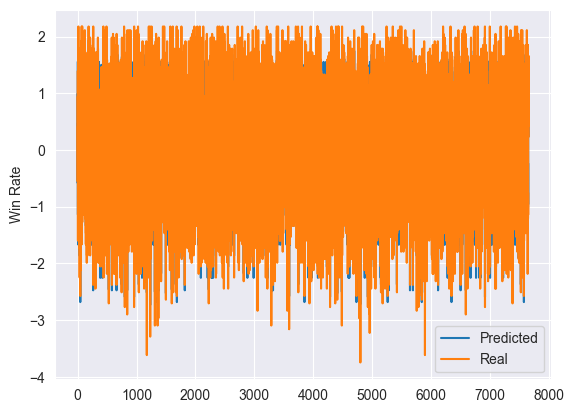

In [38]:
plt.plot(bosXPred)
plt.plot(bosXTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("Win Rate")
plt.show()

In [39]:
#Линейная

In [56]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(bosXTrain, bosYTrain)

#построение предсказания
weightPred = linReg.predict(bosXTest)

print(f"Параметры прямой: b0 = {linReg.intercept}, наклон: {linReg.coef[0]}")
print(f"y = {linReg.intercept} + {linReg.coef_[0]} x")
print(f"Коэффициент детерминации R2: {linReg.score(bosXTrain, bosYTrain)}")
plt.scatter(bosXTest, bosYTest)
plt.plot(bosXTest,weightPred, color="green")

plt.show()

AttributeError: 'LinearRegression' object has no attribute 'intercept'

NameError: name 'weightPred' is not defined

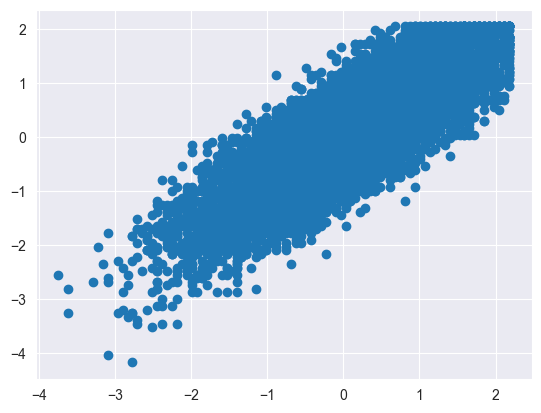

In [41]:
plt.scatter(bosXTest, bosYTest)
plt.plot(bosXTest,weightPred, color="green")

plt.show()

In [43]:
#Гребневая:

In [44]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(bosXTrain, bosYTrain)

#построение предсказания
wRigPred = rig.predict(bosXTest)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")
print(f"Коэффициент детерминации R2: {rig.score(bosXTrain, bosYTrain)}")

Параметры прямой: b0 = [-0.0032842], наклон: [0.80387452]
y = [-0.0032842] + [0.80387452] x
Коэффициент детерминации R2: 0.6498463880611253


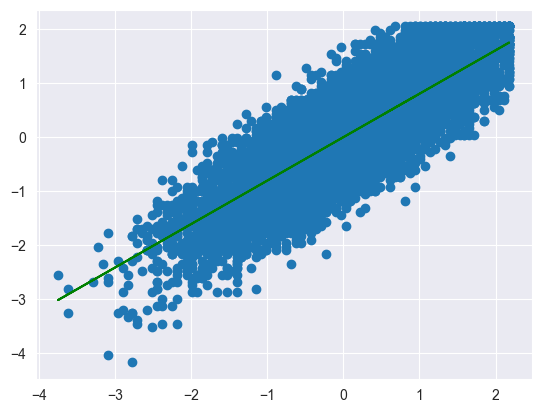

In [45]:
plt.scatter(bosXTest, bosYTest)
plt.plot(bosXTest,wRigPred, color="green")

plt.show()

In [46]:
#LASSO

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+01, tolerance: 1.814e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+01, tolerance: 1.839e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

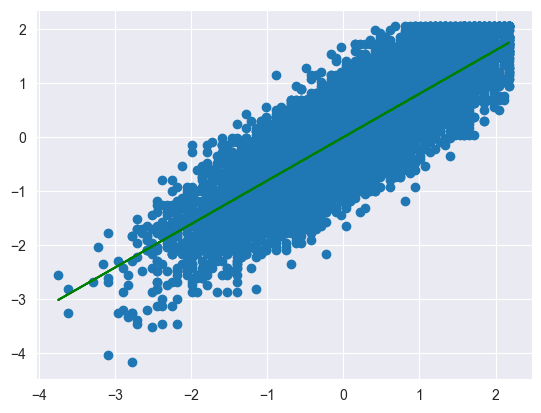

Параметры прямой: b0 = [-0.0032842], наклон: [0.80387452]
y = [-0.0032842] + [0.80387452] x
Коэффициент детерминации R2: 0.6498463880611253


In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

lasso = Lasso()

#поиск параметра "альфа" на логарифмической сетке GridSearchCV от 10^-15 до 10^15
parameters = {"alpha" : np.logspace(-15,15,31)}
lassoCV = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)

lassoCV.fit(bosXTrain, bosYTrain)
lassoPred = lassoCV.predict(bosXTest)


plt.scatter(bosXTest, bosYTest)
plt.plot(bosXTest,lassoPred, color="green")
plt.show()

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")
print(f"Коэффициент детерминации R2: {rig.score(bosXTrain, bosYTrain)}")

In [48]:
#Логистическая

In [51]:
import zipfile
zf = zipfile.ZipFile("expanded.csv", "r")
#zf.namelist() # 'Surgical-deepnet.csv'
with zf.open("train_and_test2.csv") as f:
    surgical = pd.read_csv(f)

surgical = surgical[["Passengerid", "Age", "Fare", "Sex", "sibsp", "Parch", "Pclass", "2urvived"]]

BadZipFile: File is not a zip file